# Project 2020

These are my solutions to the Project for the module Machine Learning and Statistics at GMIT. The author is Alexandra Macuga (G00376287@gmit.ie).

This is a Jupyter notebook that trains a model using the dataset. In the notebook I will explain my model and give an analysis of its accuracy.

## Dataset 

In [1]:
# Numerical arrays.
import numpy as np

# Machine learning - KMeans.
import sklearn.cluster as skcl

# Plotting.
import matplotlib.pyplot as plt

# Data frames.
import pandas as pd

# Plotting.
import seaborn as sns

# Neural networks.
import tensorflow.keras as kr

In [2]:
# Data set.
data = pd.read_csv("powerproduction.csv")
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [3]:
# Preview the first 5 lines of the loaded data 
data.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [4]:
data.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


<AxesSubplot:xlabel='speed', ylabel='power'>

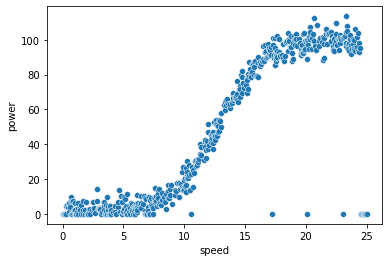

In [5]:
sns.scatterplot(x = "speed", y = "power", data = data)

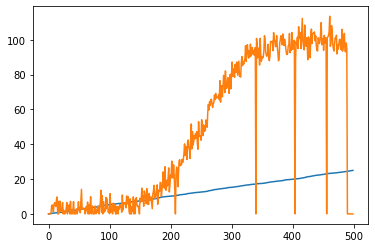

In [6]:
plt.plot(data)

## K-Means Clustering

The **KMeans** algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.[2]

In [7]:
# Perform kmeans fitting.
kmeans = skcl.KMeans(n_clusters=2, random_state=0).fit(data)

In [8]:
# See the labels of the points.
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

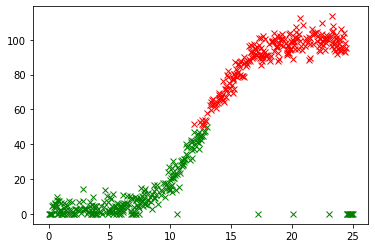

In [9]:
# Plot the data set.
# Issue fixed from: https://stackoverflow.com/a/57317580

plt.plot(data.values[kmeans.labels_ == 0][:,0], data.values[kmeans.labels_ == 0][:,1], 'gx')
plt.plot(data.values[kmeans.labels_ == 1][:,0], data.values[kmeans.labels_ == 1][:,1], 'rx')

## Statsmodels

**Statsmodels** is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct.[1]

In [10]:
# Using statsmodels.
import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(data)

# Create a model.
msm = sm.OLS(y, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.526e+32
Date:                Thu, 07 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:27:07   Log-Likelihood:                 14574.
No. Observations:                 500   AIC:                        -2.914e+04
Df Residuals:                     497   BIC:                        -2.913e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.772e-15   5.02e-15     -1.348      0.1

[1] https://www.statsmodels.org/stable/index.html

[2] https://scikit-learn.org/stable/modules/clustering.html#k-means

## Regression in keras
### Polynomial

In [11]:
poly = pd.DataFrame()
poly['x'] = np.linspace(-10.0, 10.0, 1000)
poly['y'] = poly['x'].apply(f)

NameError: name 'f' is not defined

In [ ]:
# Have a look.
plt.plot(poly['x'], poly['y']);

In [ ]:
# Re-build our model.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation='linear', kernel_initializer="ones", bias_initializer="zeros"))
model.compile('adam', loss='mean_squared_error')

In [ ]:
# Fit the data.
model.fit(poly['x'], poly['y'], epochs=500)

In [ ]:
# Plot the predictions (on the training set itself).
plt.plot(poly['x'], poly['y'], label='actual')
plt.plot(poly['x'], model.predict(poly['x']), label='prediction')
plt.legend();

### Sigmoids

In [ ]:
# Change the activation function.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation='sigmoid', kernel_initializer="ones", bias_initializer="zeros"))
model.compile('adam', loss='mean_squared_error')

In [ ]:
# Without training, let's have a look at the output.
sigdata = data
sigdata['x'] = data.speed
sigdata['y'] = data.power

In [ ]:
# Let's see what that looks like.
plt.plot(sigdata['x'], sigdata['y']);

### Back to the polynomial

In [ ]:
# Same polynomial.
f = lambda x: 2.0 * x**2 + 3.0 * x + 4.0

poly = pd.DataFrame()
poly['x'] = np.linspace(-10.0, 10.0, 1000)
poly['y'] = poly['x'].apply(f)

In [ ]:
# Train a different model.
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [ ]:
# Fit the data.
model.fit(poly['x'], poly['y'], epochs=500, batch_size=10)

In [ ]:
# Now let's see.
plt.plot(poly['x'], poly['y'], label='actual')
plt.plot(poly['x'], model.predict(poly['x']), label='prediction')
plt.legend();